# EEG Preprocessing and Analysis

เนื่องจากบทเรียนนี้จะมีการใช้คำศัพท์ทางเทคนิคและ concept ของ signal processing อยู่พอสมควร ขอให้ผู้เรียนศึกษาเนื้อหาจากบทเรียนของ Brain Code Camp โดยเฉพาะเนื้อหา Signal Processing ก่อนเพื่อให้สามารถทำความเข้าใจเนื้อหาในบทเรียนนี้ได้ง่ายมากขึ้น

# Preprocessing
การ preprocess ข้อมูล EEG นั้นสามารถทำได้หลากหลายวิธีมาก ขึ้นอยู่กับหลายปัจจัย เช่น ชนิดของข้อมูล การทดลอง สิ่งที่ต้องการศึกษา รวมถึงสมมติฐานของแต่ละคณะวิจัยเอง

<br>

ในส่วนนี้เราจะมาลองเขียนโปรแกรมในภาษา Python เพื่อทำการ preprocess ข้อมูล EEG เบื้องต้นโดยอ้างอิงขั้นตอนจากเนื้อหา [Brain Building Blocks Session 4 ในหัวข้อ EEG](https://youtu.be/HNWuIYPPQZo?si=IfgBq5_tHVQVc270) โดยมี overview ตามภาพด้านล่าง

<iframe width="560" height="315" src="https://www.youtube.com/embed/HNWuIYPPQZo?si=1YJZlZsoQjyXMYUA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>



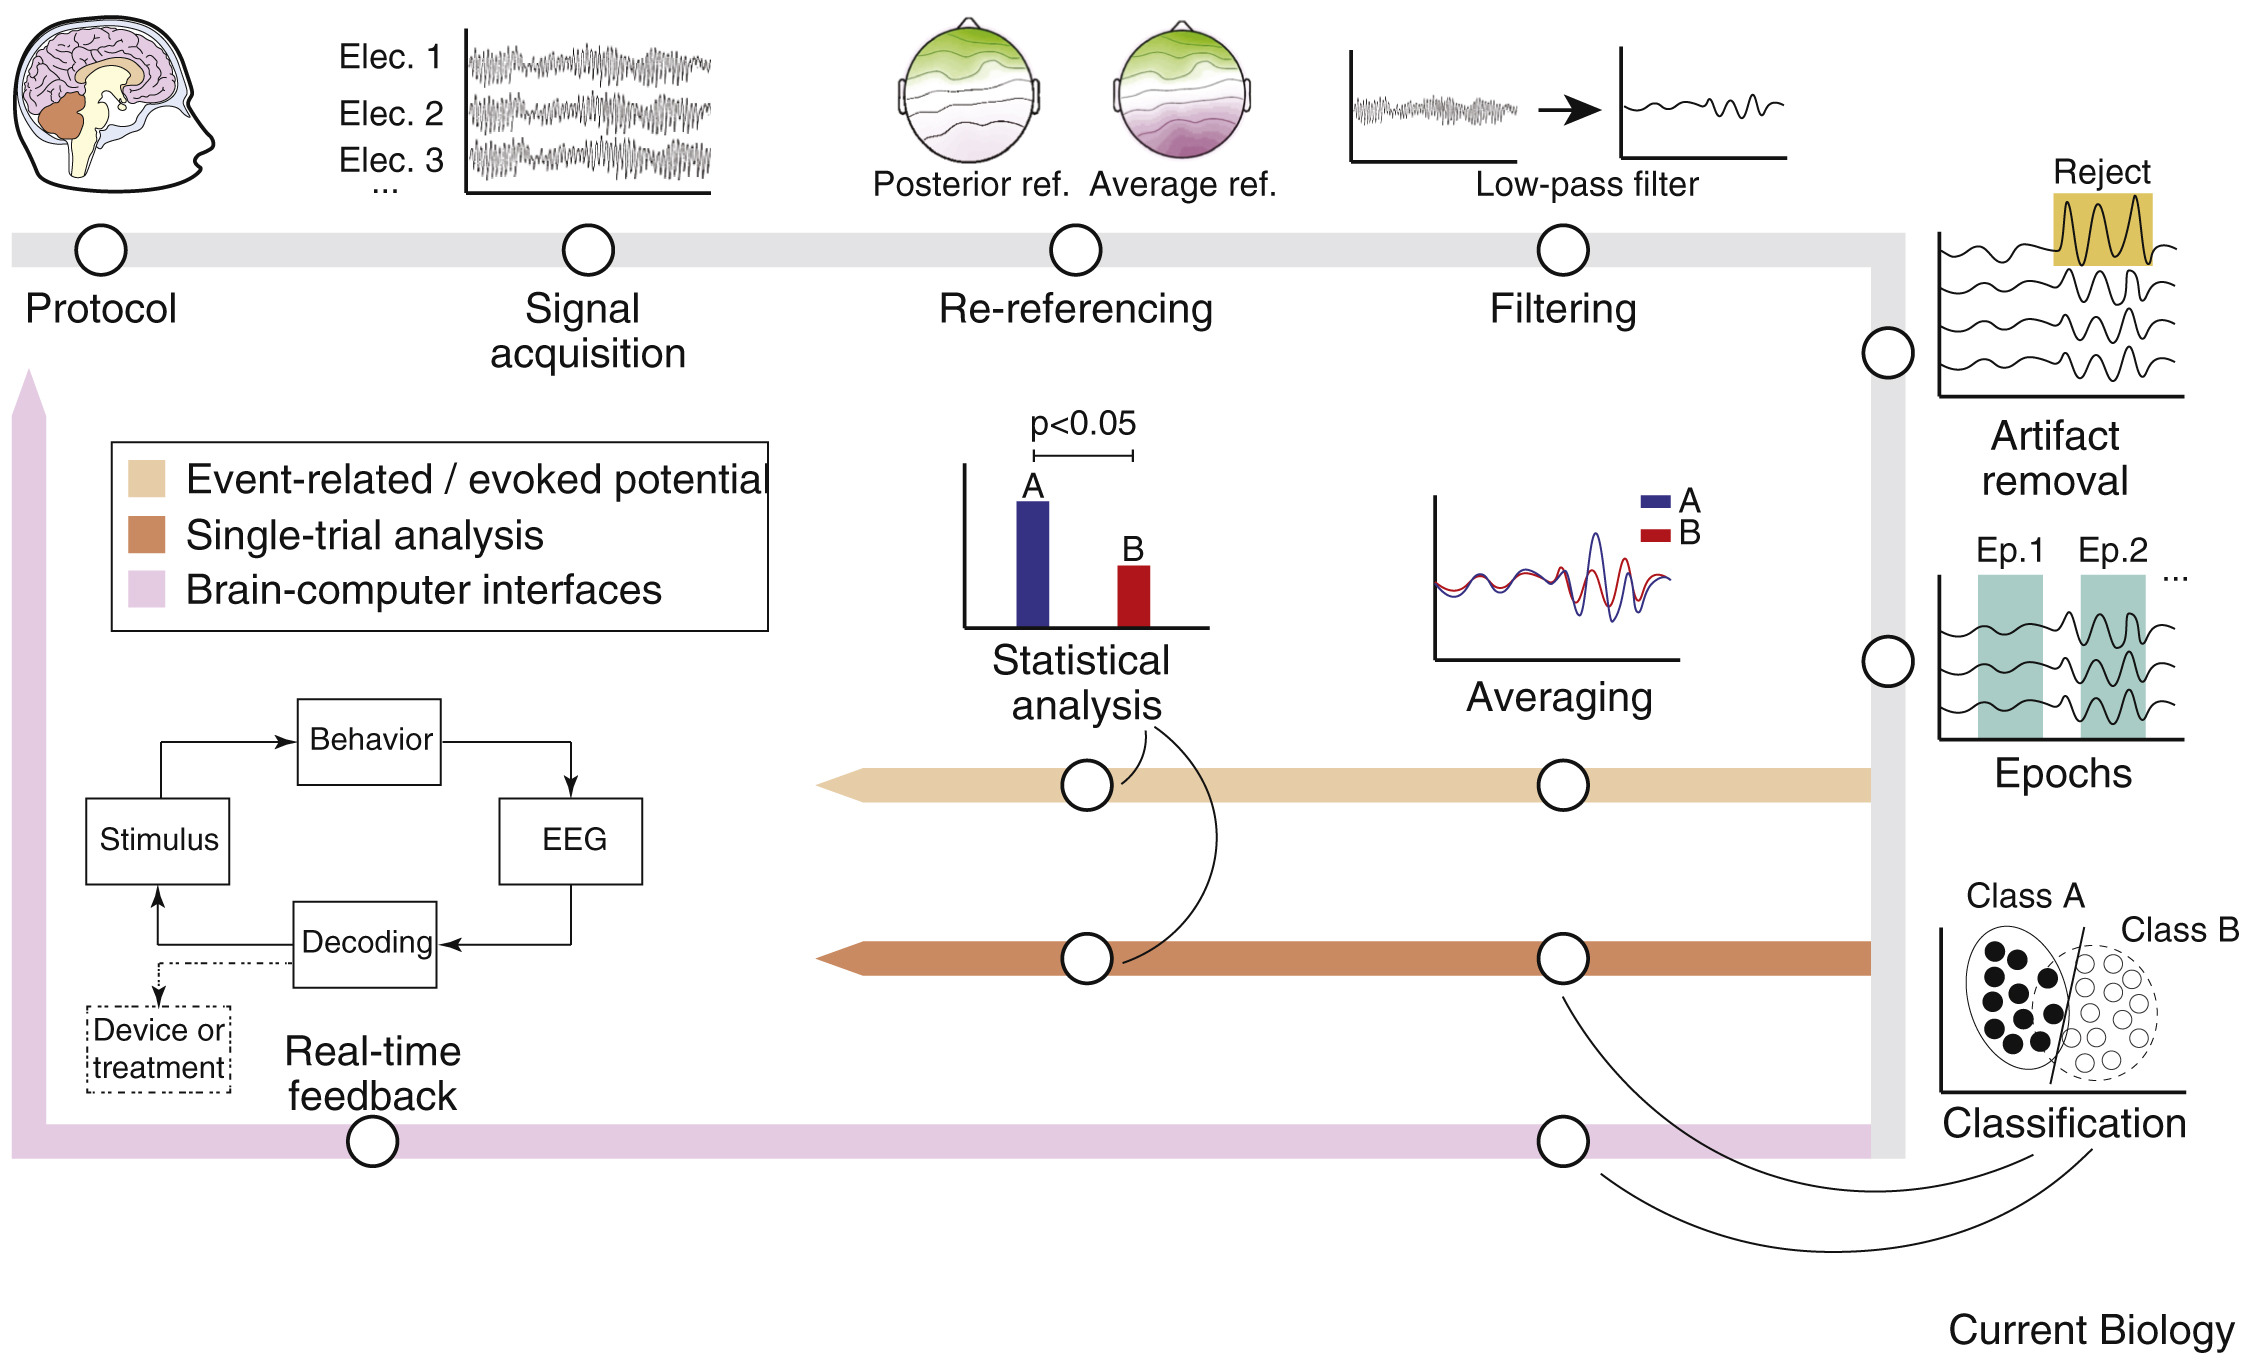

Image source: [Electroencephalography (Biasiucci et al., 2019)](https://www.sciencedirect.com/science/article/pii/S0960982218315513)

เราจะลอง preprocess ข้อมูล EEG โดยการใช้ [MNE](https://mne.tools/) แต่จริง ๆ แล้วยังมีอีกหลาย toolbox ที่เป็นที่นิยมไม่แพ้กัน เช่น EEGLAB, FieldTrip และ Brainstorm เพียงแต่ toolbox บางอันจะต้องใช้ใน MATLAB (เป็นที่นิยมมากที่สุดใน neuroscience community) ซึ่งต้องมี license สำหรับใช้งาน ทีมงานจึงเลือกใช้ MNE ซึ่งสามารถเข้าใช้งานได้ฟรี

**หมายเหตุ** code ส่วนใหญ่ที่อยู่ในบทเรียนนี้ถูกปรับแก้มาจาก tutorials หลายอันของ MNE โดยเฉพาะตัว [Overview of MEG/EEG analysis with MNE-Python
](https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py)

## Install and import packages

In [ ]:
# Install MNE
!pip install mne

In [1]:
import numpy as np
import os
import mne

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load and Visualize Data

ใช้ `mne.io.read_raw_fif` ในการโหลดข้อมูลตัวอย่างของ MNE ที่มีนามสกุล .fif มาเก็บไว้ใน variable ที่ชื่อว่า `raw` ซึ่งมี data structure ที่เรียกว่า `Raw` ซึ่งเป็น 1 ใน 3 data structure ที่สำคัญที่สุดของ MNE (`Raw`, `Epoch` และ `Evoked`)

ในกรณีที่ต้องการ load ข้อมูลไฟล์นามสกุลอื่น สามารถเรียกใช้ฟังก์ชันจาก `mne.io.read_raw_*` ได้เลย เช่น

- ใช้ `mne.io.read_raw_gdf` สำหรับข้อมูลที่มีนามสกุลเป็น .gdf (General Data Format)
- ใช้ `mne.io.read_raw_bdf` สำหรับข้อมูลที่มีนามสกุลเป็น .bdf (BioSemi Data Format)


<br>

ด้านล่างนี้เป็นคำอธิบายข้อมูลตัวอย่างนี้ที่ได้มาจาก MNE

"These data were acquired with the Neuromag Vectorview system at MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. EEG data from a 60-channel electrode cap was acquired simultaneously with the MEG. The original MRI data set was acquired with a Siemens 1.5 T Sonata scanner using an MPRAGE sequence.

In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face."

[ที่มาของคำอธิบาย](https://mne.tools/stable/documentation/datasets.html)

In [39]:
# data_path = mne.datasets.testing.data_path()
fname = r"D:\braincode\data\sub-001\eeg\sub-001_task-motion_run-3_eeg.set"

raw = mne.io.read_raw_eeglab(fname)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17740\3517104053.py:4: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)


In [40]:
len(raw.annotations)

30

In [41]:
raw.annotations.description

array(['TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T1', 'TASK1T0', 'TASK1T1',
       'TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T1',
       'TASK1T0', 'TASK1T1', 'TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T1',
       'TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T1',
       'TASK1T0', 'TASK1T1', 'TASK1T0', 'TASK1T2', 'TASK1T0', 'TASK1T1'],
      dtype='<U7')

In [ ]:
# # กำหนดชื่อไฟล์ที่เราจะทำการ download
# data_full_path = os.path.join(mne.datasets.sample.data_path(), "MEG", "sample", "sample_audvis_raw.fif")

# # Download ข้อมูลมาเก็บไว้ใน `raw` ซึ่งขั้นตอนนี้จะใช้เวลาค่อนข้างนาน
# raw = mne.io.read_raw_fif(data_full_path, preload=True)

Using default location ~/mne_data for sample...
Creating /root/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 898GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 03m17s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [42]:
# Print ข้อมูลมาดู ซึ่งจะเห็นได้ว่ามีรายละเอียดเกี่ยวกับข้อมูลจำนวนมาก เช่น มี frequency cutoff ของ highpass และ lowpass filters เป็นเท่าไหร่บ้าง
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>


### Visualize the data in the time domain

เราสามารถลอง plot ดูข้อมูลได้ โดยสามารถเลือกชนิดของข้อมูลที่สนใจ จำนวน channels ที่ต้องการดู หรือระยะเวลาในแกนเวลาที่ต้องการดูได้

**หมายเหตุ** ถ้าหากเรารัน cell ด้านล่างนอก Google Colab เราจะได้ interactive plot มา แต่ในกรณีที่ต้องการรันใน Google Colab อาจะพบว่าจะได้ plot ที่ไม่ interactive หนึ่งในวิธีที่สามารถใช้สร้าง interactive plot ก็คือการใช้ library อื่น เช่น `plotly` โดยสามารถดูตัวอย่างได้[ที่นี่](https://plotly.com/python/v3/ipython-notebooks/mne-tutorial/)

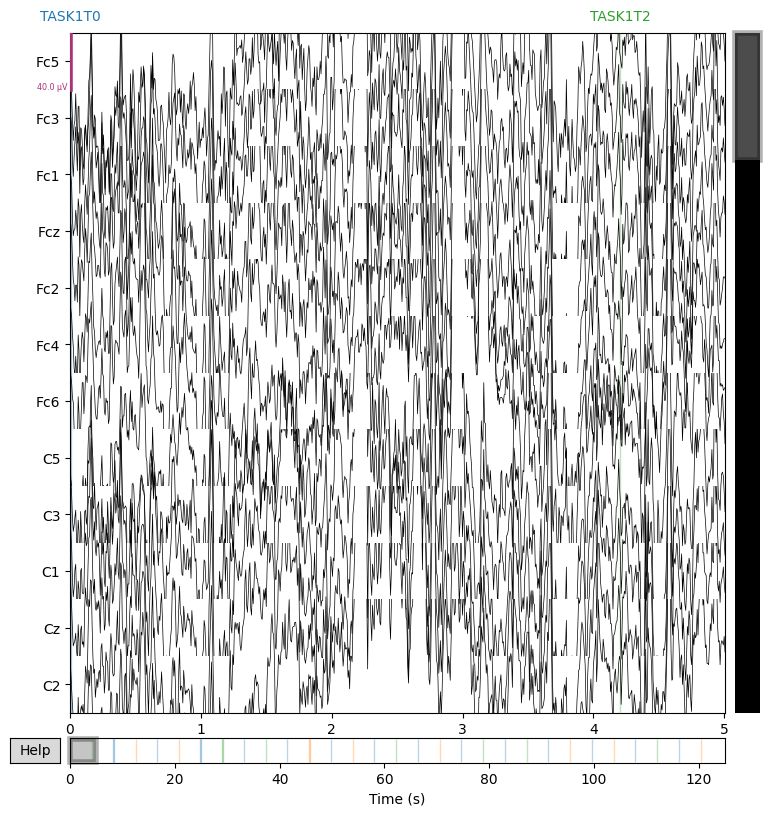

In [43]:
# ลองดูข้อมูล EEG 12 channels แรก ใน time domain เป็นระยะเวลา 6 วินาที
_ = raw.copy().pick(picks='eeg').plot(n_channels=12, duration=5)

แกน x คือแกนเวลา และ แกน y คือแกน channel ซึ่งแปลว่าข้อมูลในแต่ละ row ก็คือสัญญาณที่เก็บมาได้จากแต่ละ channel นั่นเอง

### Investigate bad channels
เราสามารถเช็คดูว่าในข้อมูลมี bad channel หรือไม่

In [44]:
print(f'Bad channel: {raw.info["bads"]}')

Bad channel: []


จะเห็นว่า MEG 2443 และ EEG 053 เป็น channels ที่ถูกระบุไว้ว่ามีปัญหา

**หมายเหตุ** ในการทำงานจริง เราควรไล่ visualize ข้อมูลด้วย ไม่ได้พึ่งพาการเรียกดู `info["bads"]` เพียงอย่างเดียว

<br>

เรามาลอง plot ดูว่า EEG 053 นี้หน้าตาแตกต่างจาก channels อื่น ๆ อย่างไร



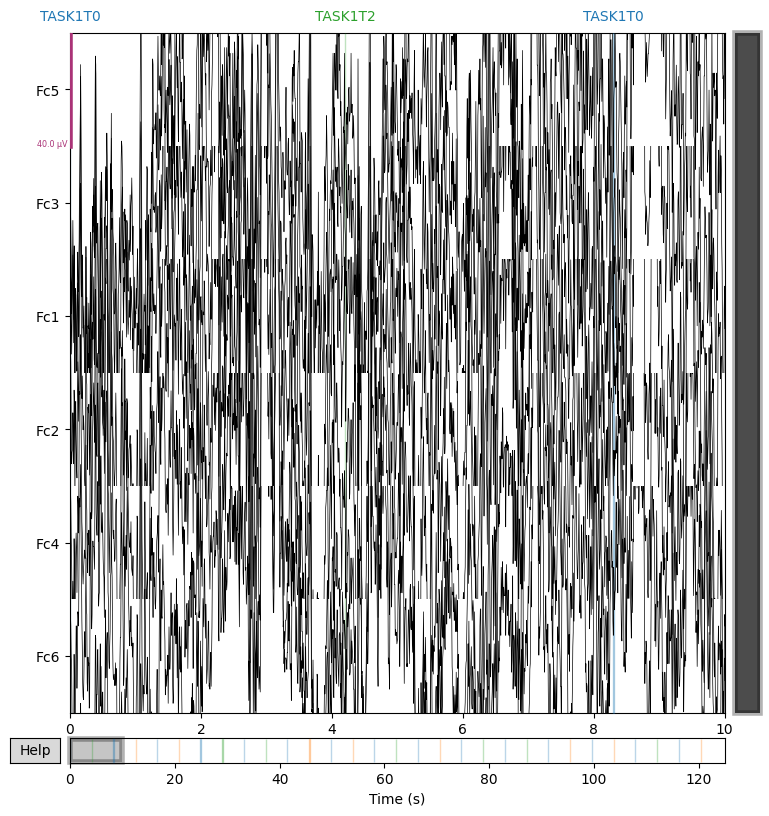

In [45]:
# เลือก channels ที่ต้องการจะ plot โดยการใช้ regular expression: EEG 051, EEG 052, ..., EEG 055 ซึ่งมีทั้ง electrodes ที่ดีและไม่ดี
channels_to_plot = mne.pick_channels_regexp(raw.ch_names, regexp="Fc[1-6]")

# การรันฟังก์ชันนี้ใน Google Colab จะส่งผลให้เกิดการ plot รูปซ้ำกันสองที โค้ดนี้เลยกำหนดให้มีการรับเอา output ที่ return ออกมา
_ = raw.plot(order=channels_to_plot, n_channels=len(channels_to_plot))

จาก plot ด้านบนพบว่า EEG 053 มีหน้าตาที่แตกต่างจาก channel อื่น ๆ มาก

ปกติแล้วเวลาเราเจอ bad channels ในข้อมูล เราสามารถเลือกที่จะทิ้ง channels เหล่านั้นไปเลยก็ได้ แต่ในหลาย ๆ กรณีการทิ้ง bad channel อาจจะไม่ใช่ตัวเลือกที่ดีที่สุด เช่น
- หากเราต้องการทำการทดลองเปรียบเทียบข้อมูลจากหลาย ๆ subjects เราอาจจะต้องการทำให้มีจำนวน channels จากแต่ละ subject เท่ากัน การทิ้ง bad channels ก็จะทำให้เกิดปัญหาได้
- หลาย ๆ โมเดลที่เป็นที่นิยมในปัจจุบันมักจะกำหนดให้จำนวนมิติข้อมูลที่จะใส่เป็น input เข้าสู่โมเดลเป็นค่าเดิมเสมอ การทิ้ง bad channels ก็จะส่งผลให้มีจำนวนมิติที่เปลี่ยนไปจากเดิมได้
- หากเรามี bad channels จำนวนมาก เราก็จะเสียข้อมูลจำนวนมาก ซึ่งจะส่งผลเสียต่อการ train โมเดลหลาย ๆ ประเภทได้

<br>

ในกรณีเหล่านี้เราสามารถทำ channel interpolation ซึ่งใน MNE เราสามารถเรียกใช้ `interpolate_bads` ได้ แต่เราจะมาทำ channel interpolation หลังจากที่เราทำ re-reference กับ filtering


**หมายเหตุ** การทำ re-reference ใน MNE จะไม่ทำการแก้ไขตัว bad channels  ถ้าหากเราทำ channel interpolation ก่อน ก็จะส่งผลให้ bad channels มีหน้าตาคล้าย ๆ กับ channel อื่น ๆ แต่หลังจากที่เรามาทำ re-reference ในภายหลัง channels ทั้งหมด ยกเว้น bad channels จะถูก re-reference ให้มีคุณลักษณะของข้อมูลที่แตกต่างไป ซึ่งทำให้ตัว bad channels มีคุณลักษณะที่แตกต่างออกไปจาก channel ที่เหลือ เนื่องจากไม่ได้รับการ re-reference

## Re-referencing the data

เราสามารถกำหนด reference ให้กับข้อมูลของเราได้ โดยการใช้ `set_eeg_reference` ซึ่งวิธีที่เป็นที่นิยมมากที่สุด 2 วิธีคือการใช้
1. Averaged mastoids (ปุ่มกกหู) หรือ earlobes เนื่องจากเป็น channel ที่อยู่ใกล้กับ channels อื่น ในขณะที่มีสัญญาณจากสมองมารบกวนน้อย
2. Average reference โดยเฉพาะในกรณีที่มี electrodes จำนวนมาก

ในที่นี้เราจะลองใช้ average reference ผ่านการเรียกใช้ method ที่ชื่อว่า `set_eeg_reference` ซึ่งการ set reference จะไม่กระทบต่อ bad channels รวมถึงจะไม่มีการนำเอา bad channels มาใช้ในการคำนวณ average reference ด้วย ([ที่มา](https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html))

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


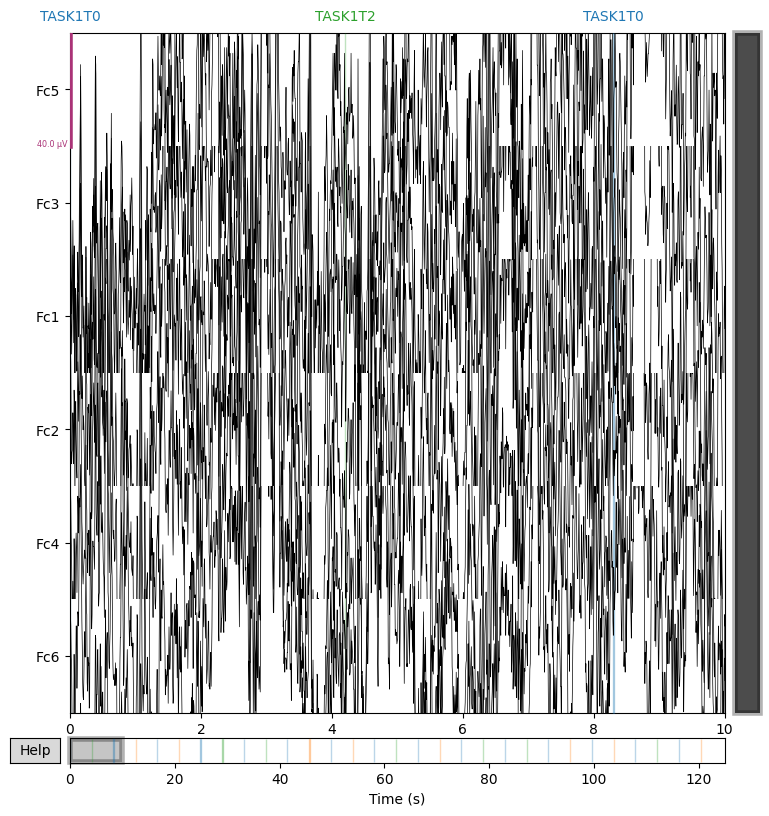

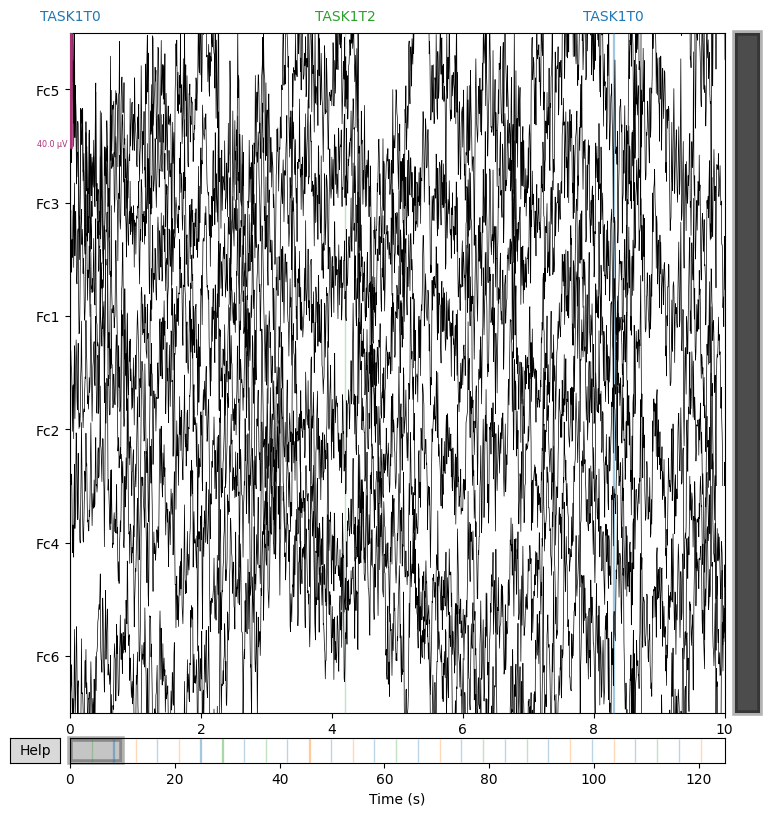

In [46]:
# Re-reference ข้อมูลโดยใช้ average reference
data_processed = raw.copy().set_eeg_reference(ref_channels="average")  # ตรงนี้เราเรียก copy() เพื่อป้องกันไม่ให้ `raw_eeg` ถูกปรับแก้ไปด้วย

for title, data in zip(["Before re-referencing", "After re-referencing"], [raw, data_processed]):
    fig = data.plot(order=channels_to_plot, n_channels=len(channels_to_plot))
    fig.suptitle(title, size="xx-large", weight="bold")

จะเห็นได้ว่า channels ทั้งหมดถูก re-reference แล้ว ยกเว้น EEG 053 ซึ่งถูกระบุไว้ว่าเป็น bad channel

<br>

อย่างไรก็ตามการทำ re-referencing เป็นขั้นตอนที่มี assumption เยอะ และยังเป็นที่ถกเถียงกันอยู่ว่า reference กับ channel ไหนดีที่สุด หรือแม้กระทั่งว่าการทำ re-referencing นั้นเป็นสิ่งที่ดีหรือไม่
([ตัวอย่างแหล่งข้อมูลที่เกี่ยวข้อง](https://youtu.be/ioIETUX4G4k?si=jIM-Ds5sb4yevM-w))

## Filtering the data

ลอง plot ตัว power spectral density (PSD) เพื่อดูว่าข้อมูลของเราประกอบไปด้วย frequency อะไรบ้าง โดยใช้ method ที่มีชื่อว่า `compute_psd`



In [13]:
!pip install PyQt5==5.15.10

In [47]:
# ในที่นี้เรา plot ดูความถี่จาก 0 Hz ไปจนถึงครึ่งหนึ่งของ sampling frequency
test = data_processed.copy().pick(picks='eeg').compute_psd(fmax=data_processed.info['sfreq']/2).plot()

Effective window size : 12.800 (s)


d:\anaconda\envs\SimMIM\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


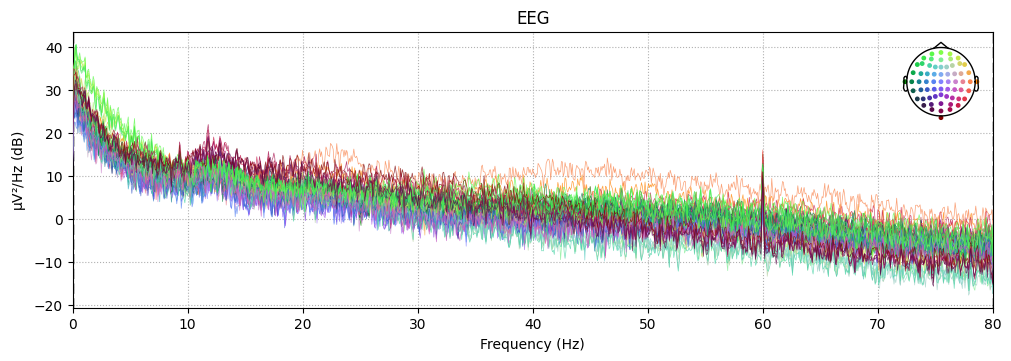

In [48]:
test

เนื่องจากข้อมูล EEG มักจะมี artifacts มารบกวนอยู่ใน signal ที่จะปรากฏอยู่ในช่วงความถี่ที่เฉพาะเจาะจง เรามักจะทำการ filter ข้อมูลของเราเพื่อกำจัด artifacts จำนวนนึงออกไป (สามารถดูตัวอย่าง artifacts และ frequency ที่เกี่ยวข้องได้[ที่นี่](https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html))

<br>

เรามาลองดูข้อมูลของเราก่อนว่าได้รับการทำ filtering มาก่อนหรือไม่

In [49]:
print(f'The data have been filtered to have the frequency passband range = {data_processed.info["highpass"]:.02f} Hz to {data_processed.info["lowpass"]:.02f} Hz')

The data have been filtered to have the frequency passband range = 0.00 Hz to 80.00 Hz


เราพบว่าข้อมูลของเราได้รับการทำ highpass filtering ที่มี frequency cutoff อยู่ที่ 0.1 Hz มาแล้ว (พยายามกำจัดหรือลดความสำคัญของข้อมูลที่มี frequency น้อยกว่า 0.1 Hz ในขณะที่พยายามไม่ปรับแก้ข้อมูลที่มี frequency มากกว่า 0.1 Hz) ซึ่งตัวเลข 0.1 Hz เป็นค่าที่ค่อนข้างถูกใช้งานกับ EEG มาก โดยมีตัวอย่างจากงานวิจัยเหล่านี้
- [Systematic biases in early ERP and ERF components as a result of high-pass filtering](https://doi.org/10.1016/j.jneumeth.2012.06.011)
- [Digital filter design for electrophysiological data – a practical approach](https://doi.org/10.1016/j.jneumeth.2014.08.002)
- [How inappropriate high-pass filters can produce artifactual effects and incorrect conclusions in ERP studies of language and cognition: high-pass filtering and artifactual ERP effects](https://doi.org/10.1111/psyp.12437)

ต่อมาเราจะทำ lowpass filtering ที่ frequency cutoff เป็น 40 Hz (30Hz-40Hz เป็นค่าที่นิยมใช้กันกับข้อมูล EEG) ขั้นตอนนี้จะพยายามกำจัดหรือลดความสำคัญของข้อมูลที่มี frequency มากกว่า 40 Hz ในขณะที่พยายามไม่ปรับแก้ข้อมูลที่มี frequency น้อยกว่า 40 Hz

<br>

อย่างไรก็ตามการเลือก frequency cutoff ที่เหมาะสมสำหรับ EEG ก็ขึ้นอยู่กับหลากหลายปัจจัย ซึ่งในปี 2023 ก็มี[ผลงานตีพิมพ์ EEG is better left alone](https://www.nature.com/articles/s41598-023-27528-0) ที่คณะวิจัยได้ทำการทดลองเพื่อทดสอบดูว่าการเลือก frequency cutoff ที่แตกต่างการมีผลต่อการวิเคราะห์ข้อมูลอย่างไร

In [50]:
# Filter ข้อมูล
data_filtered = data_processed.copy().filter(l_freq=None, h_freq=40) # ตรงนี้เราเรียก copy() เพื่อป้องกันไม่ให้ `eeg_processed` ถูกปรับแก้ไปด้วย

# Plot ตัว power spectral density ก่อนและหลังจากที่ทำ lowpass filtering
for title, data in zip(["Before lowpass filtering", "After lowpass filtering"], [data_processed, data_filtered]):
    fig = data.copy().pick(picks='eeg').compute_psd(fmax=data.info['sfreq']/2).plot(exclude="bads")
    fig.suptitle(title, size="xx-large", weight="bold")

# ตรวจสอบดูให้แน่ใจว่า frequency range เป็นไปตามที่เราต้องการหรือไม่
print(f'\n\nThe data have been filtered to have the frequency passband range = {data_filtered.info["highpass"]:.02f} Hz to {data_filtered.info["lowpass"]:.02f} Hz')

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 53 samples (0.331 s)

Effective window size : 12.800 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 12.800 (s)


The data have been filtered to have the frequency passband range = 0.00 Hz to 40.00 Hz


d:\anaconda\envs\SimMIM\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
d:\anaconda\envs\SimMIM\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


จากการดู power spectral density ข้างบน ก็จะพบว่าข้อมูลที่อยู่ในช่วง frequency ที่มากกว่า 40 Hz จะถูกลดความสำคัญ (โดยวัดจาก power) ลงเรื่อย ๆ โดยยิ่งห่างจาก 40 Hz มากเท่าไหร่ ก็จะลดลงไปมากขึ้น

ต่อมาเราจะมาลองดูหน้าตาข้อมูลของเราในแกนเวลากันบ้าง

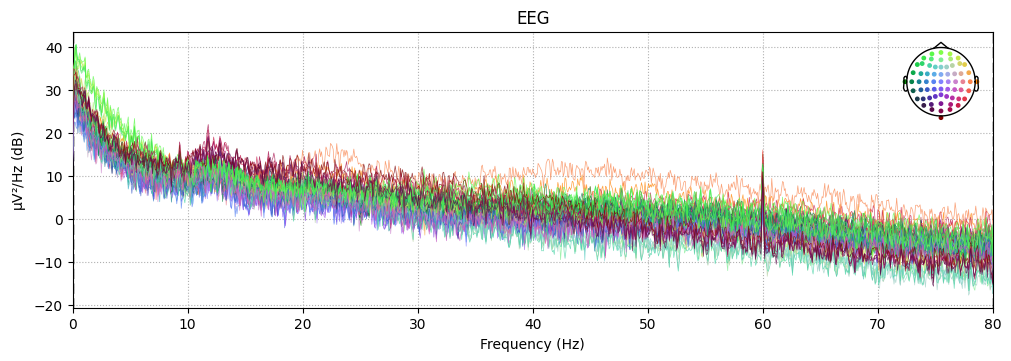

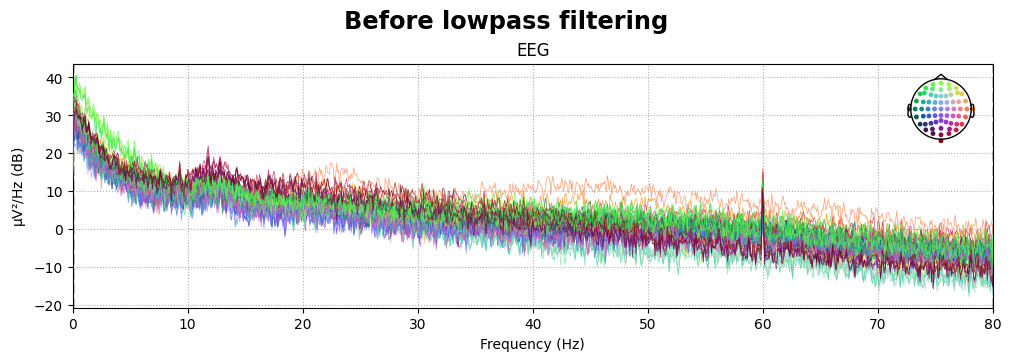

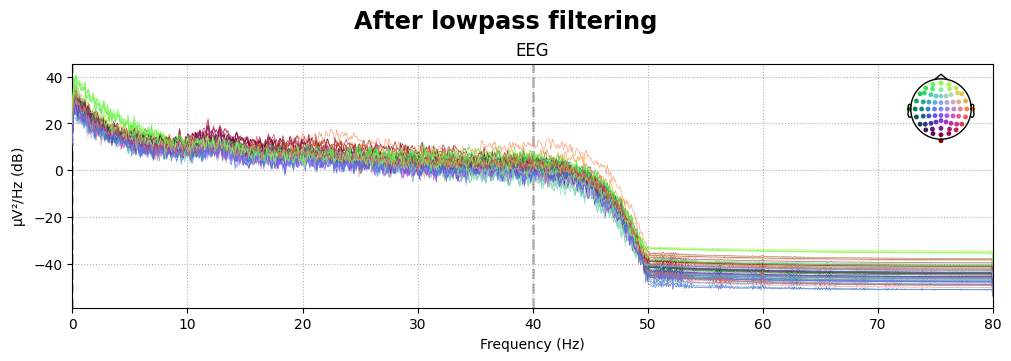

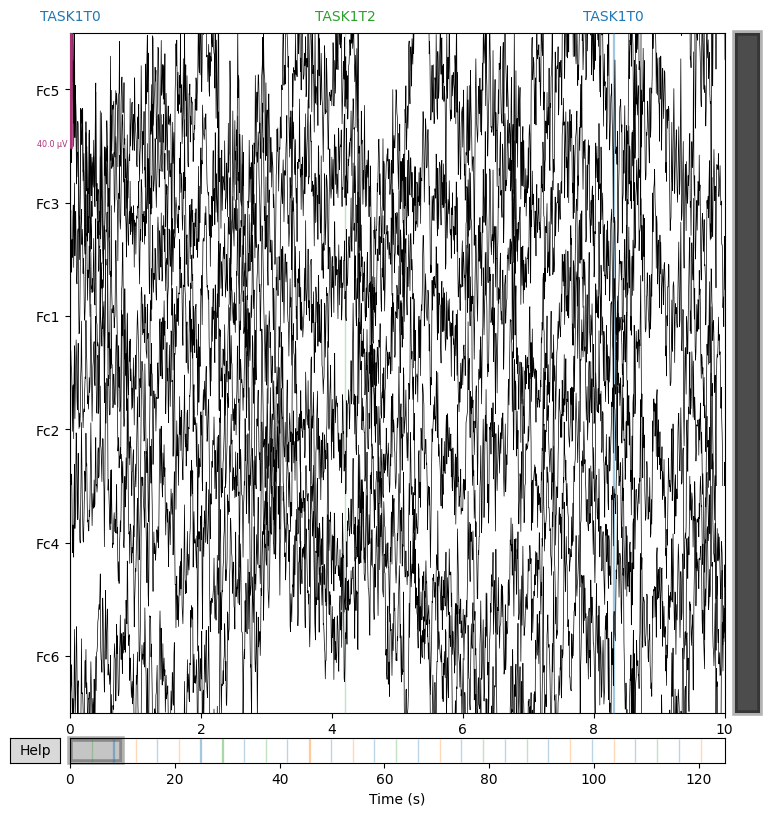

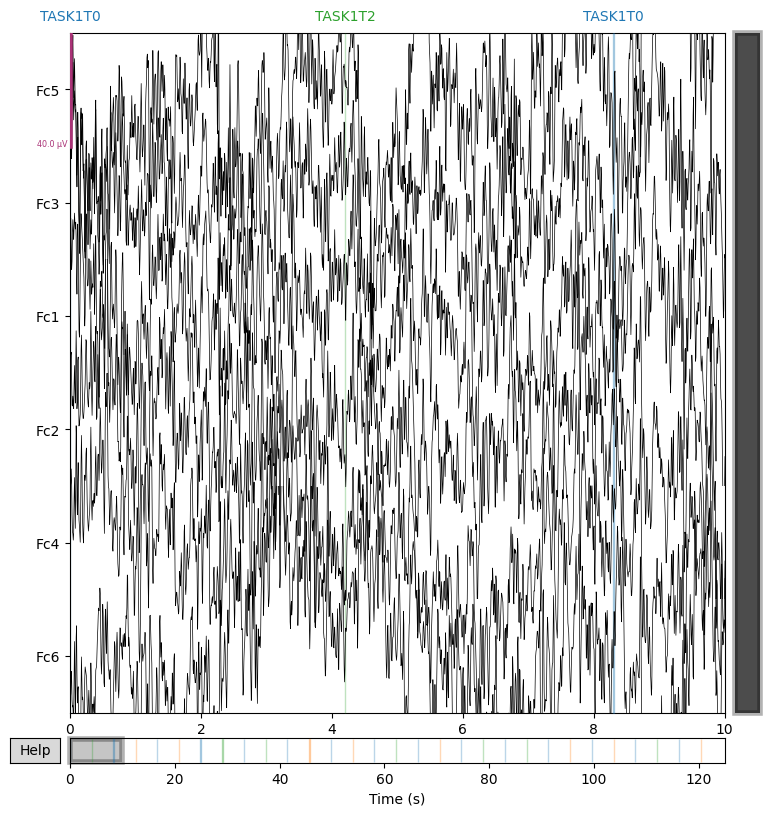

In [51]:
# Plot ข้อมูลก่อนและหลังจากที่ทำ channel interpolation
for title, data in zip(["Before lowpass filtering", "After lowpass filtering"], [data_processed, data_filtered]):
    fig = data.plot(order=channels_to_plot, n_channels=len(channels_to_plot))
    fig.suptitle(title, size="xx-large", weight="bold")

# เราจะไปขั้นตอนต่อไปโดยเอาข้อมูลที่ผ่านการทำ lowpass filtering มาใช้งานต่อ
data_processed = data_filtered
del data_filtered

เราจะเห็นได้ว่าข้อมูลที่ผ่านการทำ lowpass filtering มาแล้ว จะดู smooth ขึ้นใน time domain เนื่องจาก high frequency content ได้ถูกลดความสำคัญลง

ในตัวอย่างนี้เราสนใจเฉพาะ frequency ที่มากกว่า 0.1 Hz แต่น้อยกว่า 40 Hz เราจึงกำหนดให้ frequency cutoff เป็น 0.1 Hz และ 40 Hz แต่ในหลาย ๆ กรณี เราอาจจะสนใจเฉพาะสัญญาณจากแค่บางช่วง frequency ตามภาพด้านล่าง ([ที่มาของภาพ](https://raphaelvallat.com/bandpower.html))

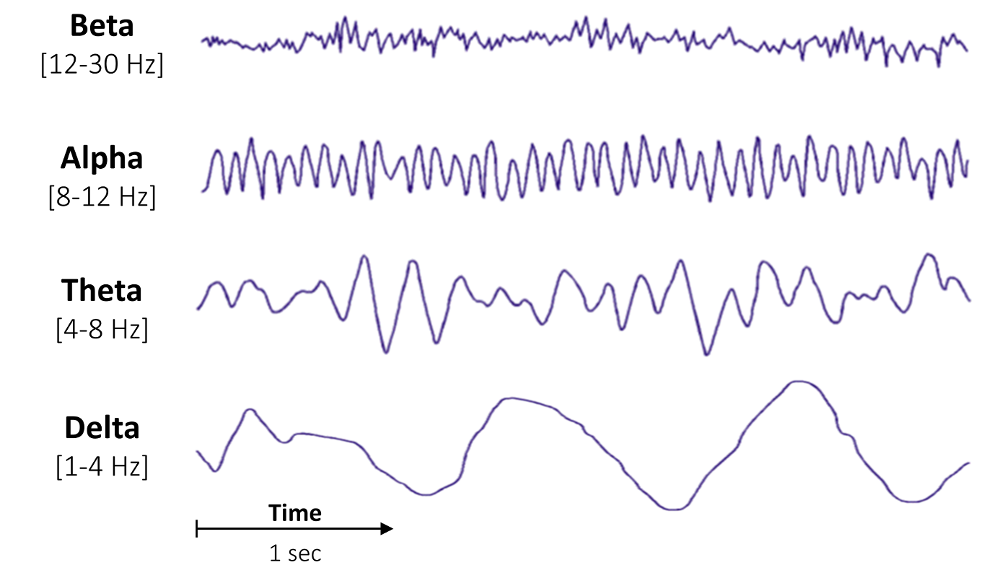

ตัวอย่างเช่น ถ้าเราต้องการศึกษาเฉพาะข้อมูลจาก Alpha band (8 Hz - 12 Hz) เราก็สามารถสร้าง filter ให้มี frequency cutoff อยู่ที่ 8 Hz และ 12 Hz ได้

<br>

เนื่องจาก EEG มี temporal resolution (resolution ในแกนเวลา) ค่อนข้างสูง การเก็บข้อมูลที่มี sampling rate สูงส่งผลให้มีจำนวนจุดในแกนเวลาค่อนข้างมาก ทำให้ต้องใช้ทรัพยากรการคำนวณมาก ในกรณีที่เราจะทำงานกับ application ที่ไม่ต้องใช้ temporal resolution มาก เราสามารถลดขนาดของข้อมูลโดยการเรียกใช้ method ของ `Raw` ที่มีชื่อว่า `resample` ได้ โดยจะกำหนดให้ sampling rate อันใหม่มีค่าที่ลดลงจากเดิม อย่างไรก็ตาม เราต้องระวังด้วยว่าค่า sampling rate ไม่น้อยเกินไป จนเกิด aliasing ไปปนเปื้อนอยู่ใน frequency ที่เราสนใจได้

## Artifact removal

จากเนื้อหา [Brain Building Blocks Session 4 ในหัวข้อ EEG](https://youtu.be/HNWuIYPPQZo?si=IfgBq5_tHVQVc270) เราจะเห็นว่าขั้นตอนนี้เรามีสิ่งที่ต้องตัดสินใจหลายอย่าง เช่น
- เราจะจัดการกับ bad channels อย่างไร
  - ใน subsection ที่ชื่อว่า investigate bad channels เราได้เห็นแล้วว่า ในกรณีนี้เราอาจจะทิ้ง channels เหล่านั้นไปได้เลย หรือ ถ้าเราไม่ต้องการทิ้ง เราก็สามารถใช้เทคนิคมาตรฐาน เช่น การทำ channel interpolation ได้
- เราจะตรวจจับข้อมูลที่คุณภาพไม่ดี (bad data detection) อย่างไร
  - ถึงแม้ว่า electrode เราอาจจะไม่มีปัญหาอะไร แต่บางทีข้อมูลของเราก็มี artifacts จำนวนมากมารบกวน ทำให้นำเอาข้อมูลไปใช้ประโยชน์ได้ยาก ซึ่งตัวอย่าง artifacts ประกอบด้วย power line noise, low-frequency drifts, ocular และ heartbeat artifacts
  - วิธีการตรวจจับ bad data ก็มีหลายวิธี เช่น
    - การตรวจดูด้วยตา (visual inspection) ซึ่งวิธีนี้ก็ต้องพึ่งพาผู้เชี่ยวชาญที่ฝึกการมอง artifact รูปแบบต่าง ๆ มาเป็นอย่างดี สามารถเข้าไปฝึกได้จาก [EEG Independent Component Labeling](https://labeling.ucsd.edu/tutorial/labels)
    - การใช้ computer algorithm ในการทำ automated artifact rejection ถึงแม้ว่าวิธีนี้เหมือนจะเป็นวิธีที่ไม่ต้องพึ่งพาผู้เชี่ยวชาญและเป็นวิธีที่สามารถใช้ตรวจจับ bad data ได้อย่างรวดเร็ว แต่ก็ยังเป็นวิธีที่มีความผิดพลาดสูงพอสมควร เมื่อเทียบกับการใช้ผู้เชี่ยวชาญมาทำ visual inspection ให้ ซึ่งก็หวังว่าในอนาคตจะมีเทคนิคใหม่ ๆ ที่สามารถทำหน้าที่นี้แบบอัตโนมัติได้อย่างรวดเร็วและแม่นยำได้
- หลังจากที่เราตรวจพบข้อมูลที่คุณภาพไม่ดีแล้ว เราก็ต้องตัดสินใจว่าจะจัดการอย่างไร เช่น
  - เราอาจจะเลือกที่จะเก็บข้อมูลไว้ ในกรณีที่เราคิดว่า artifact มันมีขนาดที่ไม่มากนัก หรือในกรณีที่เราต้องการทดสอบดู generalizability ของเทคนิคที่เราจะพัฒนาขึ้น โดยเฉพาะงานทางด้าน Brain-Computer Interface (BCI) ที่ในหลาย ๆ ครั้งเราคาดหวังว่าเทคนิคควรจะทำงานได้ ถึงแม้ว่าจะมี artifacts ปนมาตอนใช้งานจริง
  - เราอาจจะเลือกที่จะทิ้งข้อมูลส่วนนั้นไปเลย ในกรณีที่เรามีจำนวนข้อมูลที่มากพอ หรือ ในกรณีที่เราสามารถเก็บข้อมูลเพิ่มเติมได้
  - เราอาจจะเลือกที่จะซ่อมแซม (repair) ข้อมูลของเรา โดยการพยายามลด artifacts ลง ในขณะที่พยายามเก็บ signal ไว้ให้ได้มากที่สุด ซึ่งมีหลายวิธีที่เป็นที่นิยม และมีให้เรียกใช้จาก MNE เช่น independent component analysis (ICA), Maxwell filtering และ signal-space-based techniques

### Channel interpolation

Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17740\994060806.py:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  data_interp = data_processed.copy().interpolate_bads(reset_bads=False) # In-place operation


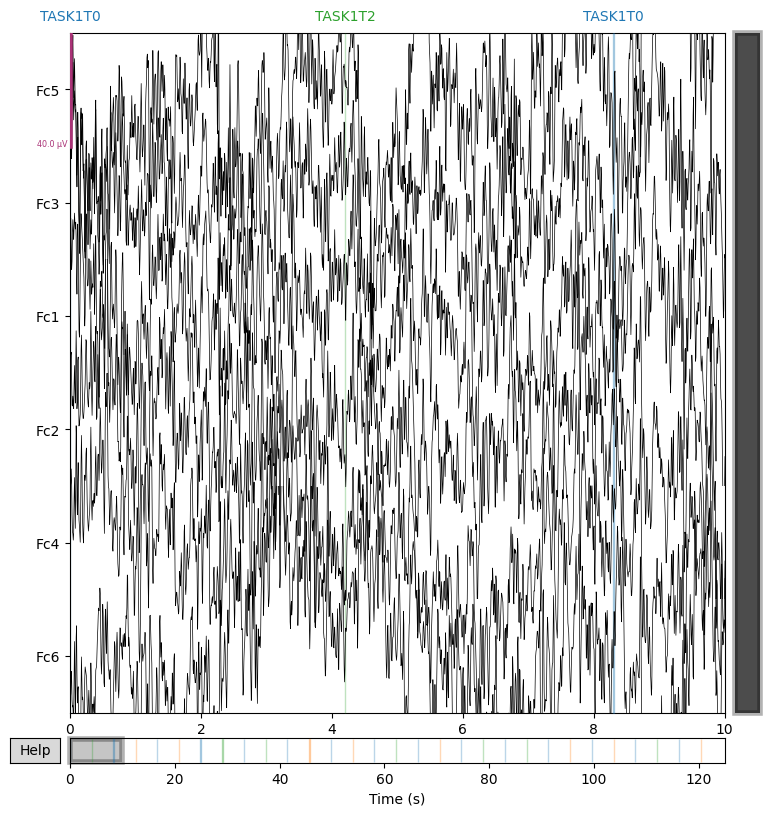

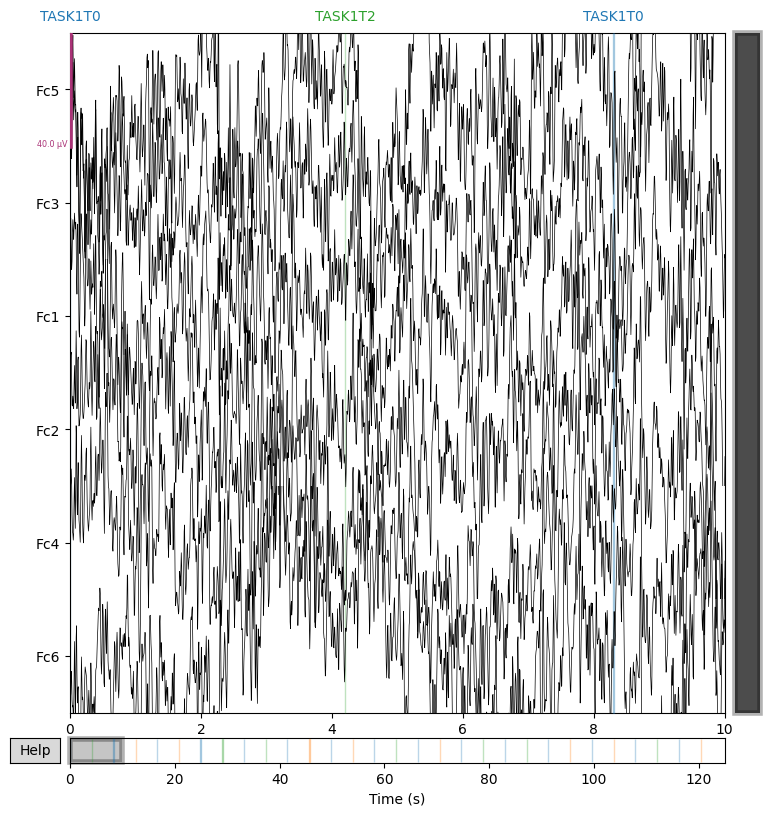

In [52]:
# ทำ channel interpolation โดยยังเก็บไว้ว่า EEG 053 เป็น bad channel ถึงแม้ว่าจะได้ทำการ interpolate แล้ว
data_interp = data_processed.copy().interpolate_bads(reset_bads=False) # In-place operation

# Plot ข้อมูลก่อนและหลังจากที่ทำ channel interpolation
for title, data in zip(["Before channel interpolation", "After channel interpolation"], [data_processed, data_interp]):
    fig = data.plot(order=channels_to_plot, n_channels=len(channels_to_plot))
    fig.suptitle(title, size="xx-large", weight="bold")

# เราจะไปสู่ขั้นตอนต่อไปโดยเอาข้อมูลที่ผ่านการทำ channel interploation มาใช้งานต่อ
data_processed = data_interp
del data_interp

จะเห็นได้ว่า EEG 053 channel ได้ถูกทำการ interpolate เรียบร้อยแล้ว

### Artifact rejection using ICA

ถึงแม้ว่าเราจะทำ filtering เพื่อกำจัด artifacts บางประเภทไปแล้ว เช่น
- การกำจัด low-frequency drift ผ่านการทำ highpass filtering
- การกำจัด noise ที่มีความถี่สูง เช่น power line noise ผ่านการทำ lowpass filtering

ยังมี artifacts อีกหลายประเภทที่เราไม่สามารถกำจัดได้ผ่านการทำ filtering แบบธรรมดาได้ เช่น Ocular artifacts (EOG)

เรามาลองใช้ ICA ในการกำจัด artifacts กัน

In [53]:
# ลองใช้ ICA กับข้อมูลของเรา
ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter='auto')
ica.fit(data_processed)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


C:\Users\Admin\AppData\Local\Temp\ipykernel_17740\795211546.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(data_processed)


Fitting ICA took 0.2s.


<ICA | raw data decomposition, method: fastica (fit in 28 iterations on 20000 samples), 15 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

เราสามารถดู independent components (ICs) ทั้งหมดที่ได้มาโดยการใช้ `ica.plot_sources`

Creating RawArray with float64 data, n_channels=15, n_times=20000
    Range : 0 ... 19999 =      0.000 ...   124.994 secs
Ready.


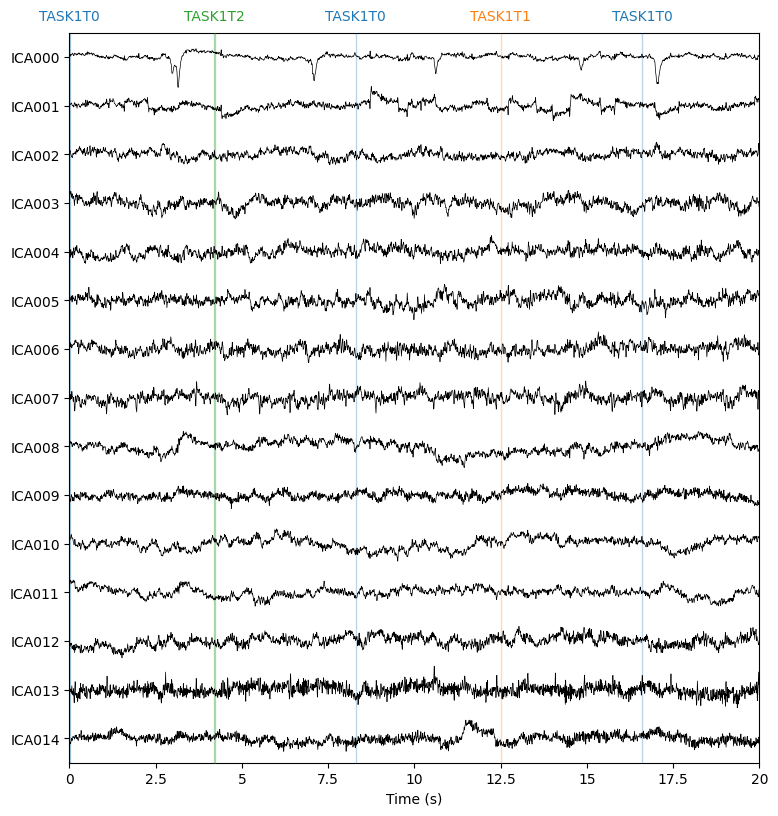

In [54]:
_ = ica.plot_sources(data_processed, show_scrollbars=False)

หากสังเกตดูดี ๆ จะเห็นว่า IC001 นั้นน่าจะเป็น ocular artifacts (หน้าตาคล้ายคลึงกับ EOG 061 มาก ๆ) และ IC002 มีลักษณะเหมือนสัญญาณการเต้นของหัวใจ

นอกจากการใช้ `ica.plot_sources` แล้ว เรายังสามารถใช้ฟังก์ชันอื่น ๆ เพื่อช่วยประกอบการตัดสินใจว่า IC ไหนที่น่าจะเกี่ยวข้องกับ artifacts ได้ เช่น `ica.plot_components`, `ica.plot_overlay` และ `ica.plot_properties`

<br>

หลังจากที่เรารู้แล้วว่า IC ไหนเกี่ยวข้องกับ artifacts เราก็จะทำการกำจัด artifacts กัน

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


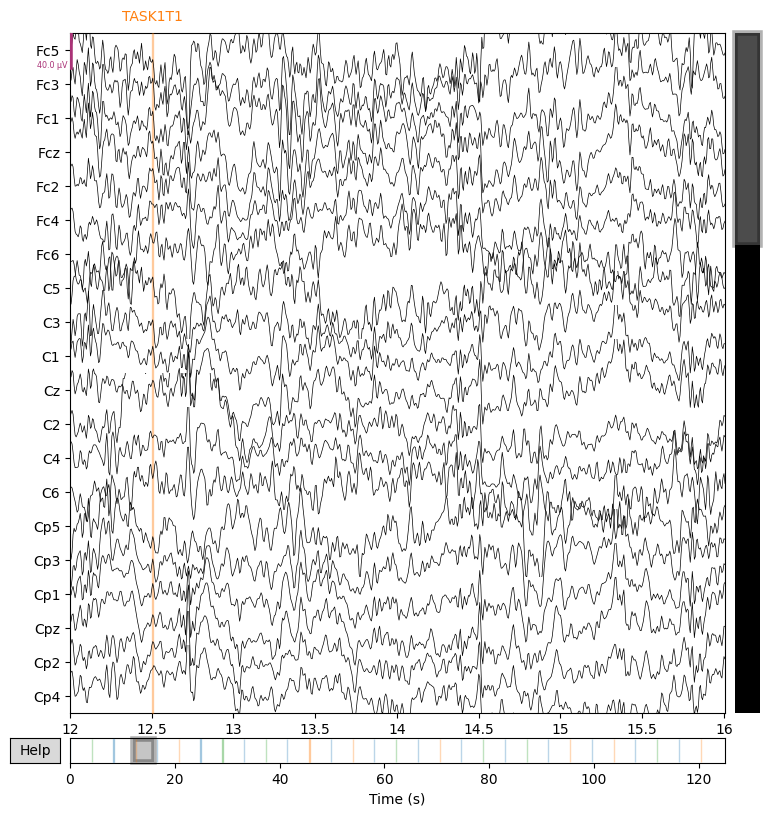

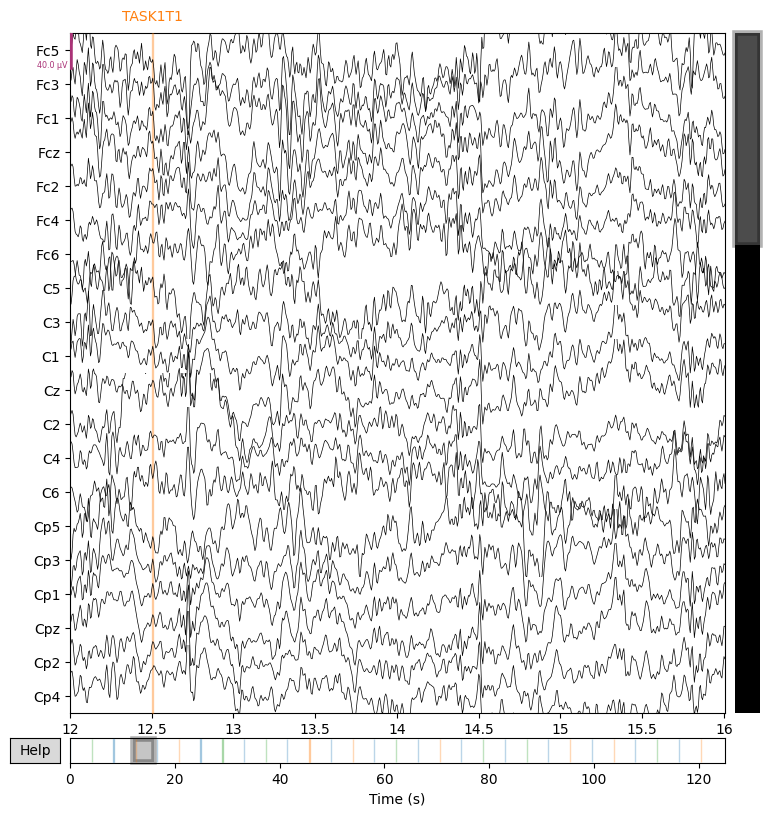

In [55]:
# ระบุ ICs ที่เราต้องการจะเอาออกจากข้อมูล
ica.exclude = []
data_ica_cleaned = data_processed.copy()

# ทำการเอา artifacts ออก
ica.apply(data_ica_cleaned)

# Plot ดูก่อนและหลังจากทำ ICA
chs = ['Fc5',
 'Fc3',
 'Fc1',
 'Fcz',
 'Fc2',
 'Fc4',
 'Fc6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'Cp5',
 'Cp3',
 'Cp1',
 'Cpz',
 'Cp2',
 'Cp4',
 'Cp6',
 'Fp1',
 'Fpz',
 'Fp2',
 'Af7',
 'Af3',
 'Afz',
 'Af4',
 'Af8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'Ft7',
 'Ft8',
 'T7',
 'T8',
 'T9',
 'T10',
 'Tp7',
 'Tp8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'Po7',
 'Po3',
 'Poz',
 'Po4',
 'Po8',
 'O1',
 'Oz',
 'O2',
 'Iz'
]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
for title, data in zip(["Before applying ICA", "After applying ICA"], [data_processed, data_ica_cleaned]):
    fig = data.plot(order=chan_idxs, start=12, duration=4)
    fig.suptitle(title, size="xx-large", weight="bold")

data_processed = data_ica_cleaned
del data_ica_cleaned

จะเห็นได้ว่าเราสามารถลด artifacts ลงจากการใช้ ICA ได้

## Epoching

หลังจากที่เราจัดการ arfifacts แล้ว ขั้นตอนต่อมาก็คือการทำ epoching ซึ่งเป็นการดึงข้อมูล epoch ที่เราสนใจ ออกมาจากข้อมูลที่เป็น time signal (time series) ยาว ๆ ที่เราเก็บมา

<br>

ในการทำ epoching เราจะใช้ STIM channel (หรือ trigger channel) ซึ่งเป็น channel ที่ระบุว่ามี event อะไร เกิดขึ้นที่เวลาไหนใน time signal ของเราบ้าง เช่น
- เวลาไหนที่เกิด stimulus onset ประเภทไหน
- เวลาไหนที่ subject กดปุ่ม (button press)

เราจะใช้ `Raw.pick` ในการเลือกข้อมูล STIM ได้

<br>

**หมายเหตุ** ตามที่ได้กล่าวถึงใน[Brain Building Blocks Session 4 ในหัวข้อ EEG](https://youtu.be/HNWuIYPPQZo?si=IfgBq5_tHVQVc270) ขั้นตอน artifact removals อาจจะเกิดขึ้นก่อนหรือหลังจากขั้นตอน epoching ก็ได้ขึ้นอยู่กับหลายปัจจัย

In [56]:
event_id = {"BASE1T0": 0,
      "BASE2T0": 1,
      "TASK1T0": 2,
      "TASK1T1": 3,
      "TASK1T2": 4,
      "TASK2T0": 5,
      "TASK2T1": 6,
      "TASK2T2": 7,
      "TASK3T0": 8,
      "TASK3T1": 9,
      "TASK3T2": 10,
      "TASK4T0": 11,
      "TASK4T1": 12,
      "TASK4T2": 13}

In [57]:
events = mne.events_from_annotations(data_processed.copy(), event_id)[0]
events

Used Annotations descriptions: ['TASK1T0', 'TASK1T1', 'TASK1T2']


array([[    0,     0,     2],
       [  672,     0,     4],
       [ 1328,     0,     2],
       [ 2000,     0,     3],
       [ 2656,     0,     2],
       [ 3328,     0,     3],
       [ 3984,     0,     2],
       [ 4656,     0,     4],
       [ 5312,     0,     2],
       [ 5984,     0,     4],
       [ 6640,     0,     2],
       [ 7312,     0,     3],
       [ 7968,     0,     2],
       [ 8640,     0,     3],
       [ 9296,     0,     2],
       [ 9968,     0,     4],
       [10624,     0,     2],
       [11296,     0,     3],
       [11952,     0,     2],
       [12624,     0,     4],
       [13280,     0,     2],
       [13952,     0,     4],
       [14608,     0,     2],
       [15280,     0,     3],
       [15936,     0,     2],
       [16608,     0,     3],
       [17264,     0,     2],
       [17936,     0,     4],
       [18592,     0,     2],
       [19264,     0,     3]])

จะเห็นว่า channel ที่ชื่อว่า STIM 014 เป็น channel ที่เกิดจากการเอา STIM channels อื่น ๆ ทั้งหมดมารวมกัน

ทีนี้เราจะมาลองดูว่ามี event อะไรเกิดขึ้นในข้อมูลชุดนี้บ้างผ่านการเรียกใช้ `mne.find_events`

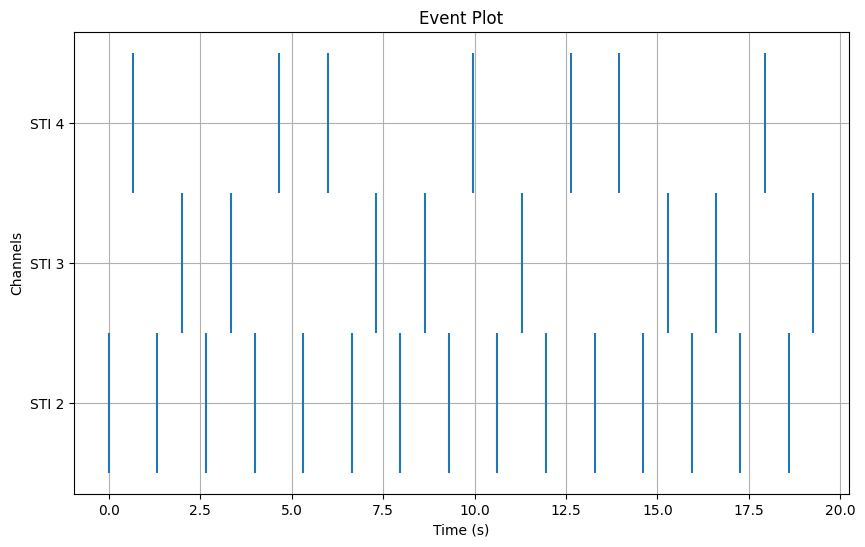

In [58]:
import numpy as np
import matplotlib.pyplot as plt


# Extracting times and channels from the array
times = events[:, 0] / 1000.0  # Convert to seconds if needed
channels = events[:, 2]

# Plotting the raster-like plot
plt.figure(figsize=(10, 6))

for i, channel in enumerate(np.unique(channels)):
    channel_times = times[channels == channel]
    plt.vlines(channel_times, i + 0.5, i + 1.5)

# Set up the channel labels on the y-axis
plt.yticks(range(1, len(np.unique(channels)) + 1), 
           ['STI ' + str(int(channel)) for channel in np.unique(channels)])

# Labeling the plot
plt.xlabel('Time (s)')
plt.ylabel('Channels')
plt.title('Event Plot')
plt.grid(True)

plt.show()


In [59]:
print(f"# of events in this dataset = {events.shape[0]}")
print(f"Here is the list of all possible event IDs: {np.unique(events[:,2])}")

# of events in this dataset = 30
Here is the list of all possible event IDs: [2 3 4]


จะเห็นได้ว่ามี events ที่แตกต่างกันทั้งหมด 13 ชนิด 

ตามข้อมูลที่สามารถหาได้จาก [Example datasets ของ MNE](https://mne.tools/stable/documentation/datasets.html) เราสามารถดูได้ว่าแต่ละ event ID หมายถึงอะไร

      "BASE1T0": "baseline (eyes open)",
      "BASE2T0": "baseline (eyes closed)",
      "TASK1T0": "Task 1 rest ",
      "TASK1T1": "onset of the real motion of opening and closing the left fist when target appears on left side of screen",
      "TASK1T2": "onset of the real motion of opening and closing the right fist when target appears on right side of screen",
      "TASK2T0": "Task 2 rest",
      "TASK2T1": "onset of the imagined motion of opening and closing the left fist when target appears on left side of screen",
      "TASK2T2": "onset of the imagined motion of opening and closing the right fist when target appears on right side of screen",
      "TASK3T0": "Task 3 rest",
      "TASK3T1": "onset of the real motion of opening and closing both fists when target appears on the top side of screen",
      "TASK3T2": "onset of the real motion of opening and closing both feet when target appears on the bottom side of screen",
      "TASK4T0": "Task 4 rest",
      "TASK4T1": "onset of the imagined motion of opening and closing both fists when target appears on the top side of screen",
      "TASK4T2": "onset of the imagined motion of opening and closing both feet when target appears on the bottom side of screen"

ลองรัน cell ถัดไป เพื่อดูว่ามี event แบบไหนเกิดขึ้นในเวลาใดบ้าง

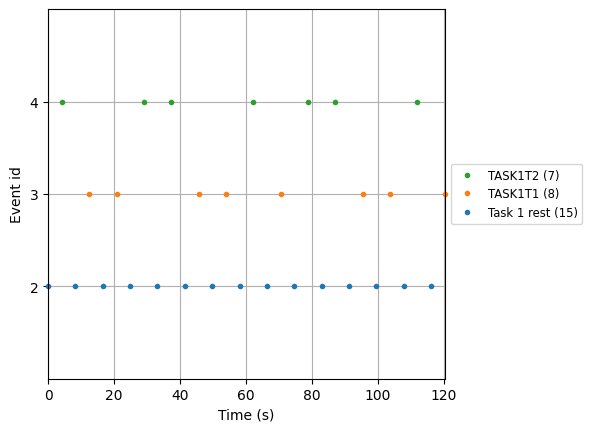

In [60]:
# สร้าง dictionary ที่แปลงจาก event description ไปเป็น event ID
event_dict = {
    "Task 1 rest": 2,
    "TASK1T1": 3,
    "TASK1T2": 4,
}

# Plot ดูว่าแต่ละ event เกิดขึ้นที่ช่วงเวลาไหนบ้าง
fig = mne.viz.plot_events(
    events, event_id=event_dict, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)

เราสามารถใช้ plot ที่ได้สร้างขึ้นในการ double check ดูว่า events เหล่านี้ดูสอดคล้องกับการทดลองที่เราได้ออกแบบไว้หรือไม่

<br>

ตอนนี้เรามี `data_processed` ที่เป็น object ประเภท `mne.Raw` แล้วก็ข้อมูลเกี่ยวกับ events ต่าง ๆ แล้ว เราสามารถทำการ epoch ตัวข้อมูลของเรามาเก็บไว้ใน object ประเภท `Epoch` ได้ ในขั้นตอนนี้เราสามารถกำหนดอะไรได้หลาย ๆ อย่าง เช่น
- จะเอา events อะไรบ้าง
- จะเอาข้อมูลประเภทไหนหรือ channel ไหนบ้าง
- ต้องการทำ baseline correction หรือไม่
- จะกำหนด rejection criteria หรือไม่


In [61]:
# Epoch ตัวข้อมูล
data_epochs = mne.Epochs(data_processed,
                         events,
                         picks='eeg',         # เลือก channel ที่เราต้องการ
                         event_id=event_dict, # ใส่ event ที่เราสนใจ
                         baseline=(None, 0),  # ใช้ข้อมูลตั้งแต่เริ่มจนถึงเวลา t = 0 สำหรับทำ baseline correction
                         reject=None,         # ไม่ทำการ reject ข้อมูล
                         preload=True)

Not setting metadata
30 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 113 original time points ...
1 bad epochs dropped


In [62]:
data_epochs

<Epochs |  29 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~1.7 MB, data loaded,
 'Task 1 rest': 14
 'TASK1T1': 8
 'TASK1T2': 7>

เราสามารถลองเปรียบเทียบข้อมูลจาก condition ที่แตกต่างกันได้ เช่น ลองเทียบข้อมูลระหว่าง visual/left และ visual/right ดู

ในกรณีที่เราต้องการให้มีจำนวนข้อมูลจากแต่ละ condition เท่ากัน เราสามารถเรียกใช้ `equalize_event_counts` ได้

In [63]:
# ดึงข้อมูลเฉพาะ visual/left
visual_left_epochs = data_epochs["TASK1T1"]

# ดึงข้อมูลเฉพาะ visual/right
visual_right_epochs = data_epochs["TASK1T2"]

# Print ข้อมูลออกมาดู
print(f"Visual left info\n\n{visual_left_epochs.info}\n")
print(f"Visual right info\n\n{visual_right_epochs.info}")

Visual left info

<Info | 9 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

Visual right info

<Info | 9 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>


ดู EEG topographic maps ที่ได้จาก visual/left และ visual right ที่เวลาแตกต่างกันดู ว่ามีคุณลักษณะแตกต่างกันหรือไม่

visual/left


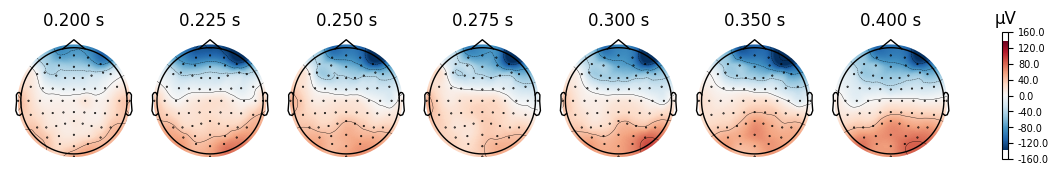

visual/right


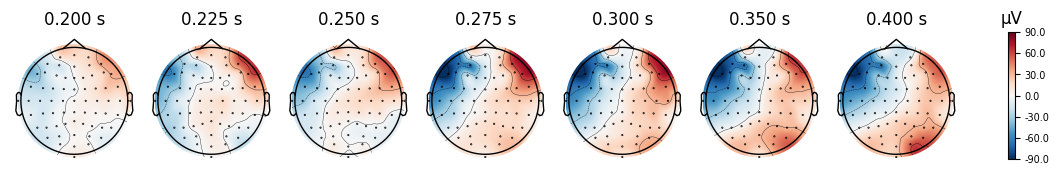

In [67]:
print('visual/left')
_ = visual_left_epochs.average().plot_topomap(times=[ 0.2,0.225,0.25,0.275, 0.3, 0.35, 0.4])
print('visual/right')
_ = visual_right_epochs.average().plot_topomap(times=[ 0.2,0.225,0.25,0.275, 0.3, 0.35, 0.4])

เราสังเกตได้ว่า
1. ไม่มี contralateral activity ที่ baseline (0ms)
2. มี strong contralateral activity โดยที่มีความเป็น field ที่ชัดเจน และ localized อยู่ที่ posterior electrodes (over visual regions) อยู่ที่ 100ms  แม้ว่า visual / left ที่ 100ms ดูจะหายไปเร็วกว่า visual / right ไปนิด แต่อยู่ในวิสัยที่เป็นได้
3. contralateral activity หายไปหลังจากนั้น โดยที่ 200ms โดยไม่เห็น clear localized field อีกต่อไปด้วยซ้ำ

## บทส่งท้ายของ EEG preprocessing
1. ในบทเรียนนี้ เราได้ทดลอง preprocess ข้อมูล EEG โดยการเรียกใช้ฟังก์ชันต่าง ๆ จาก [MNE](https://mne.tools/) แต่จริง ๆ แล้วยังมีอีกหลาย toolbox ที่เป็นที่นิยมไม่แพ้กัน เช่น [EEGLAB](https://sccn.ucsd.edu/eeglab), [FieldTrip](https://www.fieldtriptoolbox.org/) และ [Brainstorm](https://neuroimage.usc.edu/brainstorm/) เพียงแต่ toolbox บางอันจะต้องใช้ใน MATLAB (เป็นที่นิยมมากที่สุดใน neuroscience community) ซึ่งต้องมี license สำหรับใช้งาน ทีมงานจึงเลือกใช้ MNE ซึ่งสามารถเข้าใช้งานได้ฟรีสำหรับบทเรียนนี้
2. ตามที่ได้กล่าวไว้ข้างต้น preprocessing pipeline ใบบทเรียนนี้เป็นแค่ 1 ใน pipeline ที่เป็นไปได้จำนวนมากที่ถูกนำมาใช้กับ EEG ใน neuroscience community เองก็เป็นที่รู้กันว่า ในตอนนี้ยังไม่มี pipeline ใดที่มีความเหมาะสมกับ application ทุกอย่าง ดังนั้นคงเป็นเรื่องยากที่จะบอกว่า pipeline ไหนเหมาะที่สุดสำหรับ application ที่เรากำลังสนใจอยู่ ทีมงานจึงขอแนะนำให้ทุกคนลองไปทำ literature review ดูว่ามีงานชิ้นไหนที่มีความเกี่ยวข้องกับ EEG application ที่เราสนใจเวลาจะเริ่มทำโปรเจค เพื่อใช้เป็นแนวทางในการทำ preprocessing และทำ analysis โดยอยากให้อ่านดูว่างานเหล่านั้น เค้าใช้ pipeline แบบไหน ด้วยเหตุผลอะไร เพื่อให้เราเลือก pipeline ที่เหมาะสมกับโปรเจคของเราที่สุดได้
  - ตัวอย่างความเห็นของผู้เชี่ยวชาญในสาย
    - [Overview of possible preprocessing steps](https://youtu.be/JMB9nZNGVyk?si=i4b-qXeGU-TRe38w) โดย Dr. Mike X Cohen ซึ่งเป็นผู้เขียนหนังสือ [Analyzing neural time series data: theory and practice](https://direct.mit.edu/books/monograph/4013/Analyzing-Neural-Time-Series-DataTheory-and) ที่มีผู้ใช้เป็น reference จำนวนมาก
    - [What is the optimal automated EEG pipeline?](https://youtu.be/mW7u2YEK3ZY?si=YDq5UbbTUfIjW9xk) โดย Dr. Arnaud Delorme ซึ่งเป็น main contributor ของ EEGLAB toolbox ซึ่งเป็น toolbox ที่นิยมมากในวงการ neuroscience
    - มีผลงานตีพิมพ์จากปี 2023 ในวารสาร Scientific Reports ชื่อ [EEG is better left alone](https://www.nature.com/articles/s41598-023-27528-0) ซึ่งเขียนและทำการทดลองโดย Dr. Arnaud Delorme ที่ได้ลอง investigate ดูว่า แต่ละส่วนของ preprocessing pipeline มันมี*ความสำคัญ*มากน้อยแค่ไหนต่อการเปรียบเทียบสัญญาณ EEG ที่มาจาก condition ที่แตกต่างกัน ผู้ที่สนใจสามารถไปศึกษาดูผลงานตีพิมพ์นี้ได้


**Selected Extra Resources**
- [Mike X Cohen](https://www.youtube.com/@mikexcohen1) Youtube channel
- [EEGLAB](https://www.youtube.com/@EEGLABchannel) Youtube channel โดยเฉพาะ [EEG automated processing](https://youtube.com/playlist?list=PLXc9qfVbMMN2wJKCL4UhDZc4D2rzeD_OA&si=QU3dvCefuNpbhoNV) playlist
- [Introduction to EEG/MEG data analysis](https://youtube.com/playlist?list=PLp67eqWCj2f_DBsCMkIOBpBbLWGAUKtu5&si=3E5CT93vt15hjj5X) by MRCCBU

# EEG Analysis

หลังจากที่เราได้ preprocess ข้อมูลแล้ว เราสามารถลองเอาสิ่งที่เราได้เรียนมาในบทเรียนก่อนหน้ามาลองวิเคราะห์ข้อมูลดูได้ โดยที่เราจะลองใช้ principal component analysis (ซึ่งเป็นเทคนิคแบบ unsupervised learning) ดูว่าจะสามารถแยก visual/left ออกจาก visual/right โดยที่ไม่ต้องใช้ข้อมูล labels (บางทีก็เรียกว่า true classes, targets, ground truths, หรือ ผลเฉลย) ได้หรือไม่

## PCA

เนื่องจากเราได้เรียน PCA ไปแล้วในช่วงต้นของกิจกรรม Brain Code Camp เราจะไม่อธิบายข้อมูลเชิงเทคนิคในนี้มากนัก และเขียนฟังก์ชันมาใช้งานเลย

In [42]:
def apply_PCA_EEG(data, labels, n_components=3, label_list=None, title=None):

    num_classes = len(label_list)

    # ลองลดมิติโดยใช้ PCA
    model_pca = PCA(n_components=n_components, whiten=True)
    data_pca = model_pca.fit_transform(data)

    # Print ดู variance ที่อธิบายด้วย principal components 3 ตัวแรก
    print(f"% variance captured by PC1 = {model_pca.explained_variance_ratio_[0]*100: 0.2f}")
    print(f"% variance captured by PC2 = {model_pca.explained_variance_ratio_[1]*100: 0.2f}")
    print(f"% variance captured by PC3 = {model_pca.explained_variance_ratio_[2]*100: 0.2f}")

    # Plot ผลที่ได้
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='rainbow', alpha=0.5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.xlabel('PC1 score')
    plt.ylabel('PC2 score')

    plt.subplot(1,3,2)
    plt.scatter(data_pca[:,0], data_pca[:,2], c=labels, cmap='rainbow', alpha=0.5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.xlabel('PC1 score')
    plt.ylabel('PC3 score')
    plt.title(title)

    plt.subplot(1,3,3)
    plt.scatter(data_pca[:,1], data_pca[:,2], c=labels, cmap='rainbow', alpha=0.5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(num_classes+1)-0.5).set_ticks(np.arange(num_classes), labels=label_list)
    plt.xlabel('PC2 score')
    plt.ylabel('PC3 score')

    plt.show()

    return data_pca, model_pca

### All channels and time points

ดึงข้อมูลจาก visual/left และ visual/right มาทุก channels

In [43]:
# ดึงข้อมูลเฉพาะ visual/left
data_visual_left = visual_left_epochs.get_data(copy=True)

# ดึงข้อมูลเฉพาะ visual/right
data_visual_right = visual_right_epochs.get_data(copy=True)

# print จำนวนมิติของข้อมูลมาดู
print(f"data_visual_left have {data_visual_left.shape[0]} trials, {data_visual_left.shape[1]} channels, and {data_visual_left.shape[2]} time points")
print(f"data_visual_right have {data_visual_right.shape[0]} trials, {data_visual_right.shape[1]} channels, and {data_visual_right.shape[2]} time points")

data_visual_left have 8 trials, 64 channels, and 113 time points
data_visual_right have 7 trials, 64 channels, and 113 time points


ตอนนี้เราได้ข้อมูล `data_visual_left` และ `data_visual_right` ซึ่งเป็น numpy array ซึ่งเป็นชนิดของข้อมูลที่เราคุ้นเคยเป็นอย่างดี และรองรับการใช้เครื่องมือสำหรับการวิเคราะห์จำนวนมาก ต่อไปเราจะลอง apply PCA ดู โดยเราจะทำการ concatenate dimensions 2 อันหลัง (channels และ time points) รวมเรียกเป็น features

Current shape of our data: (15, 7232)
Current shape of our labels: (15,)
% variance captured by PC1 =  39.14
% variance captured by PC2 =  20.34
% variance captured by PC3 =  7.32


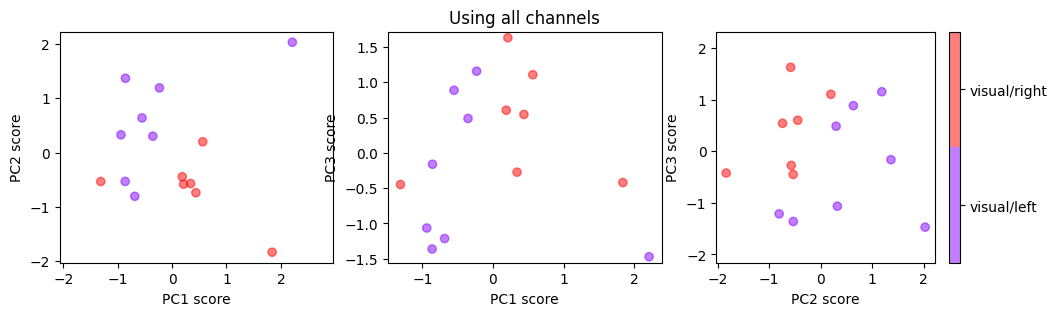

In [44]:
# เตรียมข้อมูลที่มีการจัดเรียงมิติสอดคล้องกับความต้องการของ PCA (n_samples, n_features)
data_visual_left_flatten = np.reshape(data_visual_left, (data_visual_left.shape[0],-1))
data_visual_right_flatten = np.reshape(data_visual_right, (data_visual_right.shape[0],-1))

# รวมข้อมูลจาก 2 conditions
data_visual_flatten = np.concatenate((data_visual_left_flatten, data_visual_right_flatten), axis=0)

# สร้าง labels สำหรับข้อมูลทั้งหมด โดยใช้ 0 แทน visual left condition และ 1 แทน visual right condition
labels_visual = np.concatenate((np.zeros(data_visual_left_flatten.shape[0]), np.ones(data_visual_right_flatten.shape[0])))

# Print รายละเอียดขนาดมาดู
print(f"Current shape of our data: {data_visual_flatten.shape}")
print(f"Current shape of our labels: {labels_visual.shape}")

# ลองลดมิติโดยใช้ PCA
_ = apply_PCA_EEG(data_visual_flatten, labels_visual, n_components=3, label_list=['visual/left', 'visual/right'], title='Using all channels')

จะเห็นได้ว่าการใช้ PCA มาลดมิติกับ features ที่ไม่ได้ถูกคิดมาเป็นอย่างดีในกรณีนี้ (ทำ concatenation ธรรมดา) ส่งผลให้ได้ข้อมูลที่ไม่ได้แยกออกจากกันได้ด้วยตา

จากผลที่ได้ตรงนี้ หากเราต้องการทำ classifier สำหรับจำแนกประเภท visual/right กับ visual/left ออกจากกัน เรามีหลายทิศทางให้เลือก เช่น

- พยายามคิด features ที่ดีกว่านี้ แล้วทำ PCA อีกรอบ
- ใช้เทคนิคลดมิติประเภทอื่น ๆ เช่น เทคนิคแบบ nonlinear และ/หรือ เทคนิคแบบ superivsed ที่ใช้ labels ในกระบวนการลดมิติ
- สร้าง classifier จากเทคนิคทาง machine learning โดยอาจไม่ต้องทำการลดมิติเลย
- นำเอาหลาย ๆ อย่างที่เขียนไว้ด้านบนมาผสมกัน

<br>

ถ้าหากเรายังจำผลที่ได้จาก cell สุดท้ายที่เป็น code ของ subsection ที่มีชื่อว่า Preprocessing เราจะเห็นว่าจริง ๆ แล้ว visual/right กับ visual/left นั้นมีความแตกต่างที่เห็นได้ชัดมากใน channels ที่อยู่บริเวณใกล้ ๆ กับ occipital lobes ที่เวลาประมาณ 0.8s ไปจนถึง 1.2s หลังจากเกิด stimulus onset ดังนั้นเราสามารถใช้ความรู้ของ domain knowledge มา"สร้าง" feature ที่น่าจะดีขึ้นได้

### Subset of channels

ใน subsection นี้เราจะลองทำ PCA กับ channels ที่อยู่ใกล้กับบริเวณ occipital lobe ซึ่งเราจะลองหยิบมา 6 ตำแหน่งกัน ประกอบด้วย EEG 054, EEG 055, EEG 056, EEG 057, EEG 058 และ EEG 059 และจะดึง time points ที่อยู่ระหว่างเวลาประมาณ 0.8s ไปจนถึง 1.2s เท่านั้น

<br>

**หมายเหตุ** ข้อมูลตัวอย่างที่เราใช้ ไม่ได้ตั้งชื่อตาม convention ของ Montage มาตรฐาน (เช่น C1, FC3, O1, PO9 ฯลฯ ดังแสดงในภาพด้านล่าง) ในกรณีที่เราใช้ข้อมูลที่ตั้งชื่อมาแบบมาตรฐาน เราจะสามารถดึงเอา channels ที่อยู่ใกล้กับ brain regions ที่เราสนใจได้ง่ายมากขึ้น

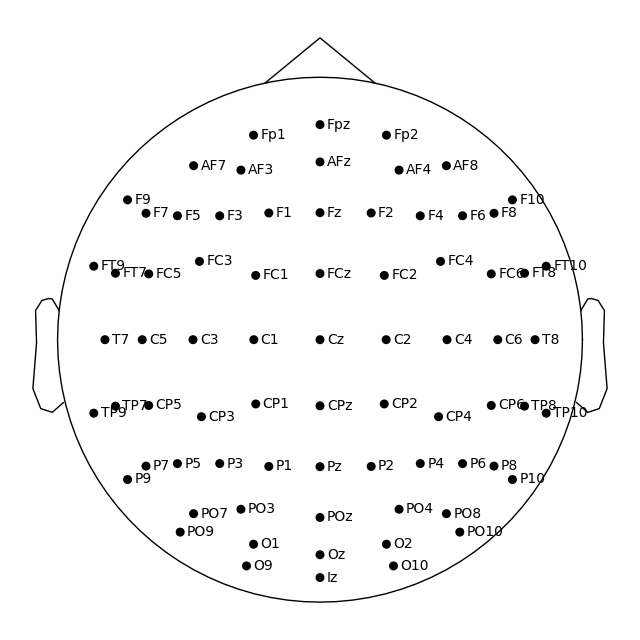

ภาพนี้มาจาก [Working with sensor locations](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py) ของ MNE



เราลอง double check ดูก่อนกว่า channels EEG 054, EEG 055, EEG 056, EEG 057, EEG 058 และ EEG 059 มันอยู่แถว ๆ occipital lobe จริงหรือไม่

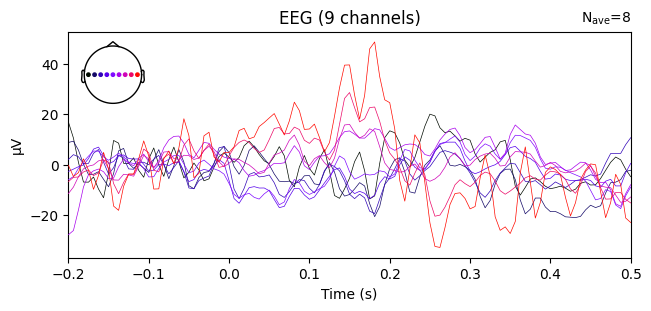

In [45]:
hopefully_occipital_channels = ['T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8']
_ = visual_left_epochs.average().pick(picks=hopefully_occipital_channels).plot()

หากดูจาก topographic maps จะพบว่า channels เหล่านี้ อยู่บริเวณใกล้เคียงกับ occipital lobe

ที่นี้เรามาลองดึงข้อมูลจากบริเวณนี้กัน

In [46]:
# ดึงข้อมูลเฉพาะ visual/left จาก 6 electrodes และ จากช่วงเวลาเฉพาะเจาะจง
data_subset_visual_left = visual_left_epochs.pick(picks=hopefully_occipital_channels).get_data(tmin=0.08, tmax=0.12, copy=True)

# ดึงข้อมูลเฉพาะ visual/right จาก 6 electrodes และ จากช่วงเวลาเฉพาะเจาะจง
data_subset_visual_right = visual_right_epochs.pick(picks=hopefully_occipital_channels).get_data(tmin=0.08, tmax=0.12, copy=True)

# print จำนวนมิติของข้อมูลมาดู
print(f"data_visual_left have {data_subset_visual_left.shape[0]} trials, {data_subset_visual_left.shape[1]} channels, and {data_subset_visual_left.shape[2]} time points")
print(f"data_visual_right have {data_subset_visual_right.shape[0]} trials, {data_subset_visual_right.shape[1]} channels, and {data_subset_visual_right.shape[2]} time points")

data_visual_left have 8 trials, 9 channels, and 7 time points
data_visual_right have 7 trials, 9 channels, and 7 time points


ลองใช้ PCA กับข้อมูลตรงนี้ดู แล้วนำไปเทียบกับผล PCA ที่ได้จากการใช้ channels ทุกอันและใช้ทุก time points เลย

Current shape of our data: (15, 63)
Current shape of our labels: (15,)
% variance captured by PC1 =  42.49
% variance captured by PC2 =  22.76
% variance captured by PC3 =  11.18


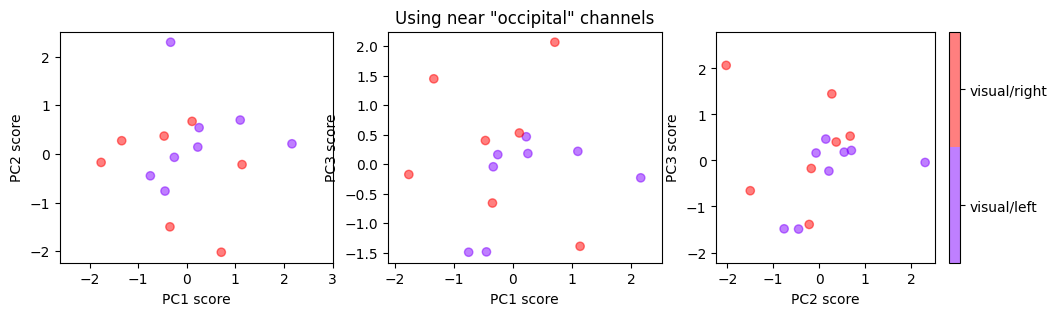

% variance captured by PC1 =  39.14
% variance captured by PC2 =  20.34
% variance captured by PC3 =  7.32


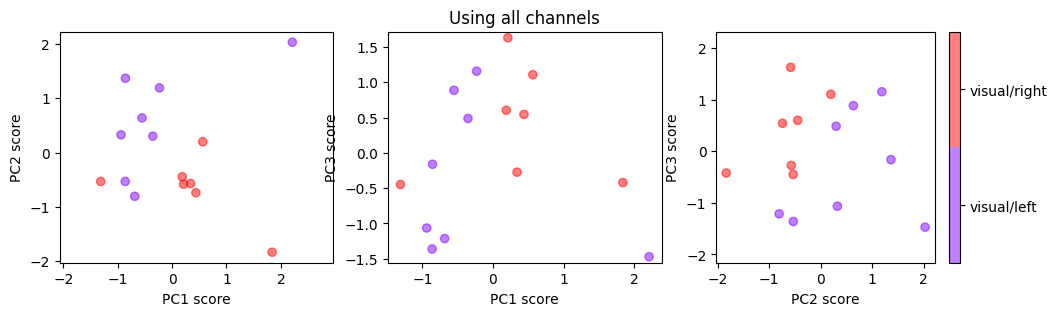

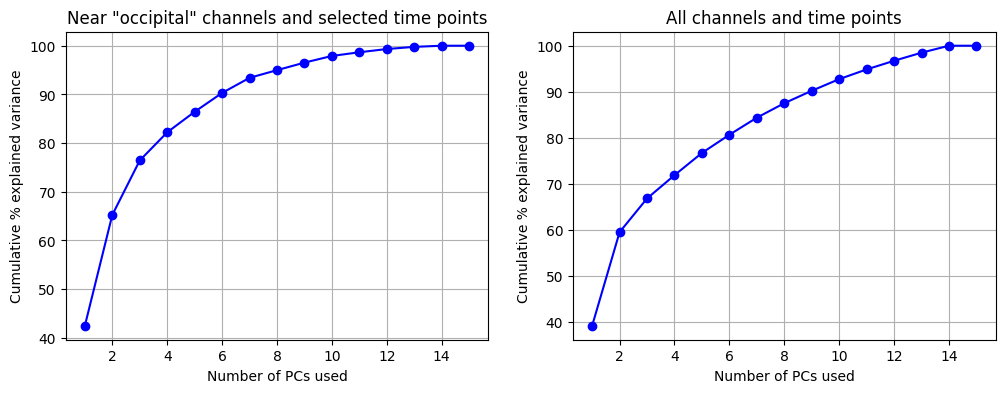

In [47]:
# เตรียมข้อมูลที่มีการจัดเรียงมิติสอดคล้องกับความต้องการของ PCA (n_samples, n_features)
data_subset_visual_left_flatten = np.reshape(data_subset_visual_left, (data_subset_visual_left.shape[0],-1))
data_subset_visual_right_flatten = np.reshape(data_subset_visual_right, (data_subset_visual_right.shape[0],-1))

# รวมข้อมูลจาก 2 conditions
data_subset_visual_flatten = np.concatenate((data_subset_visual_left_flatten, data_subset_visual_right_flatten), axis=0)

# สร้าง labels สำหรับข้อมูลทั้งหมด โดยใช้ 0 แทน visual left condition และ 1 แทน visual right condition
labels_visual = np.concatenate((np.zeros(data_subset_visual_left_flatten.shape[0]), np.ones(data_subset_visual_right_flatten.shape[0])))

# Print รายละเอียดขนาดมาดู
print(f"Current shape of our data: {data_subset_visual_flatten.shape}")
print(f"Current shape of our labels: {labels_visual.shape}")

# ลดมิติโดยใช้ PCA กับ channels เพียง 6 อันที่เราเลือกมาในช่วงเวลาที่เราเลือกมา
n_components = 15
_, model_subset_pca = apply_PCA_EEG(data_subset_visual_flatten, labels_visual, n_components=n_components, label_list=['visual/left', 'visual/right'], title='Using near "occipital" channels')

# ลดมิติโดยใช้ PCA กับ channels ทั้งหมด ในทุกเวลา
_, model_pca = apply_PCA_EEG(data_visual_flatten, labels_visual, n_components=n_components, label_list=['visual/left', 'visual/right'], title='Using all channels')

# Plot ดูว่าการเอา PC มารวมกันหลาย ๆ ตัว (เริ่มจากตัวแรก เรียงไป) จะสามารถอธิบาย variance รวมได้กี่ %
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# สำหรับข้อมูลที่ใช้แค่ channels ที่เลือกมา และในช่วงเวลาที่เลือกมา
cumulative_exp_var = np.cumsum(model_subset_pca.explained_variance_ratio_*100)
ax[0].plot(np.arange(1, n_components+1), cumulative_exp_var, c='b', marker='o')
ax[0].set(xlabel='Number of PCs used', ylabel='Cumulative % explained variance')
ax[0].grid(True)
ax[0].title.set_text(f'Near "occipital" channels and selected time points')

# สำหรับข้อมูลที่ใช้ทุก channels และ ทุกช่วงเวลา
cumulative_exp_var = np.cumsum(model_pca.explained_variance_ratio_*100)
ax[1].plot(np.arange(1, n_components+1), cumulative_exp_var, c='b', marker='o')
ax[1].set(xlabel='Number of PCs used', ylabel='Cumulative % explained variance')
ax[1].grid(True)
ax[1].title.set_text('All channels and time points')

plt.show()

เราจะเห็นได้ว่าการใช้ domain knowledge มาช่วยเลือก features ส่งผลให้การลดมิติแบบง่าย ๆ ผ่านการใช้ PCA (ซึ่งเป็นเทคนิคที่ไม่ได้ใช้ข้อมูลผลเฉลยว่าแต่ละ sample เป็น visual/right หรือ visual/left เลย) สามารถแยก visual/right ออกจาก visual/left ได้ดีมากขึ้นมาก เมื่อเทียบกับการไม่ใช้ domain knowledge เลย

จาก PC plots ที่เราได้รับ เราก็จะเห็นว่าโจทย์แยก visual/right vs visual/left นั้นเป็นโจทย์ที่ง่าย ถ้าเรามี domain knowledge ทำให้เราไม่มีความจำเป็นต้องไปใช้โมเดลที่มีความซับซ้อนในการทำ classifier ได้

## บทส่งท้ายของ Analysis

การนำเอา domain knowledge มาช่วยพัฒนา features หรือแม้กระทั่งช่วยออกแบบโมเดลนั้นเป็นสิ่งที่สำคัญมาก ๆ ในหลาย ๆ ครั้ง สิ่งนี้สำคัญมากกว่าการเลือกโมเดลที่มีความซับซ้อนสูงซึ่งมักจะต้องพึ่งพาการเก็บข้อมูลจำนวนมากเพื่อมาสอนโมเดลเสียอีก

<br>

ในโจทย์ตัวอย่างอันนี้ การใช้ domain knowledge ช่วยเราหลายอย่าง
- ช่วยให้ข้อมูลมีขนาดที่ลดลงกว่าเดิมมาก ส่งผลให้สามารถประมวลผลได้เร็วขึ้น ใช้ memory และ space น้อยลง ส่งผลให้สามารถนำเอาไป deploy จริงได้ง่าย โดยเฉพาะ application ที่ต้องการ real-time processing บน device ที่ไม่ได้มีทรัพยากรการคำนวณมากนัก
- ช่วยให้สามารถใช้โมเดลที่ไม่ซับซ้อน ซึ่งมักจะมาพร้อมกับคุณสมบัติ "explainable" (โดยเฉพาะเทคนิคที่เป็น linear) มากกว่าการใช้โมเดลที่ซับซ้อนสูง ๆ เช่น deep learning ซึ่งโมเดลที่ explainable ก็มักจะช่วยให้ผู้ใช้งานรู้สึกเชื่อมั่นในความสามารถของโมเดลมากขึ้น โดยเฉพาะใน healthcare applications

# ผู้จัดทำ

**ผู้จัดทำบทเรียน** ดร. อิทธิ ฉัตรนันทเวช

**ผู้ตรวจสอบบทเรียน** ผศ.​พิเศษ ดร. ชัยภัทร ชุณหรัศมิ์